# PROJET 3 : APPLICATION DE SANTE PUBLIQUE (NETTOYAGE)

*Mathieu GENTHON (mars-avril 2020)*

## SOMMAIRE<a class="anchor" id="sommaire"></a>
### 1 - [Contexte du projet](#1)<a class="anchor" id="sommaire"></a>
### 2 - [Importation des librairies et chargement dataframe](#2)<a class="anchor" id="sommaire"></a>
### 3 - [Description du Data Set](#3)<a class="anchor" id="sommaire"></a>
#### 3.1 - [Open Food Facts Data](#31)<a class="anchor" id="sommaire"></a>
#### 3.2 - [Doublons](#32)<a class="anchor" id="sommaire"></a>
#### 3.3 - [Variables intéressantes](#33)<a class="anchor" id="sommaire"></a>
#### 3.4 - [Nettoyage du DataFrame - Multiples filtres](#34)<a class="anchor" id="sommaire"></a>
#### 3.5 - [Exportation des data frames](#35)<a class="anchor" id="sommaire"></a>


### 1 - [Contexte du projet](#1)<a class="anchor" id="1"></a>

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.
Extrait de l’appel à projets :
Le jeu de données Open Food Fact est disponible sur le site officiel. Les variables sont définies à cette adresse.
Les champs sont séparés en quatre sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

3) Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.



**Idée d'application :**
Eat What You Like

L'application propose des menus équilibré et sains pour une semaine ou pour une période que l'utilisateur choisit. Il est possible de switcher les plats.
L'application est paramétrable (adultes, nourissons, enfants, adoslescants, femme enceintess, profils sportifs ou non, etc...) et calcule les apports nutritionnels idéaux.

Une fois le menu de la semaine choisit, l'application calcule la liste des courses associés avec les bonnes quantités.
On peut même imaginer que l'application transmette directement cette liste vers des sites de Drive via un fichier XML par exemple.
Par la suite, on pourrait également imaginer une application qui propose différents régimes et les  décline en liste de courses (régimes pour mincir, régime pour se préparer à une épreuve sportive, etc...)

**Recherches sur la nutrition**
Il existe 3 macro nutriments qui apportent de l'énergie : 
- Protéines
- Lipides
- Glucides ou carbohydrates

2 autres peuvent être considérés comme des macro nutriments car l'organisme en a besoin dans des quantités plus ou moins importantes
- certains minéraux (calcium, du chlore, du magnésium, du phosphore) (besoin : 1 à 2 g par jour)
- l'eau

Il existe 2 micro nutriments qui ont un rôle fonctionnel. Ils sont nécessaires en faible quantité et permettent à l’organisme d’utiliser les macronutriments. Ces minéraux sont appelés oligo-éléments parce que l’organisme n’en a besoin qu’en toutes petites quantités. :
- Vitamines
- Mineraux

Les fibres facilitent la digestion et sont importantes pour l'organisme.Ce sont de longs glucides complexes (beosin 30 g/jour)
Les aliments contiennent également des additifs(conservateurs, émulsifiants, antioxydants et stabilisateurs, )

### 2 - [Importation des librairies et chargement dataframe](#2)<a class="anchor" id="2"></a>

In [1]:
# On importe les librairies dont on devrait avoir besoin pour le projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
from FunctionsACP import *
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None) # On affiche toutes les colonnes des df

In [2]:
# On charge les données depuis des fichiers en local et on crée des data frame pour chaque fichier.
path='C:/Users/GENTHON-M/Documents/formation/Open Classrooms/3-Santé publique/'
nrows = None
df = pd.read_csv(path+"en.openfoodfacts.org.products.csv", sep='\t', nrows=nrows, low_memory=False, encoding='utf-8')
df.shape

(1174423, 178)

In [420]:
# Suppression des doublons
df = df.drop_duplicates()
# Recalcul de l'index
df = df.reset_index(drop=True)
df.shape

(1174376, 178)

### 3 - [Description du Data Set](#3)<a class="anchor" id="3"></a>

#### 3.1 - [Open Food Fact Data](#3)<a class="anchor" id="31"></a>

In [421]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,1569.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,1.4,0.560000,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [422]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174376 entries, 0 to 1174375
Data columns (total 178 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   code                                        object 
 1   url                                         object 
 2   creator                                     object 
 3   created_t                                   int64  
 4   created_datetime                            object 
 5   last_modified_t                             int64  
 6   last_modified_datetime                      object 
 7   product_name                                object 
 8   generic_name                                object 
 9   quantity                                    object 
 10  packaging                                   object 
 11  packaging_tags                              object 
 12  brands                                      object 
 13  brands_tags               

In [423]:
df.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.174376e+06,1.174376e+06,0.0,0.0,2.884540e+05,0.0,471912.000000,471912.000000,0.0,471912.000000,0.0,331447.000000,346815.000000,9.419800e+04,8.564590e+05,9.305710e+05,960.000000,923631.000000,893079.000000,1.0,0.0,1.0,4.000000,9.000000,1.0,3.000000,1.0,4.000000,1.0000,0.0,3.000000,2.000000,0.0,24624.000000,24679.000000,1660.000000,311.000000,102.000000,138.000000,391.000000,200.000000,17.000000,5.00000,1.00,43.000000,21.000000,0.0,0.0,0.0,0.0,0.0,144479.000000,145325.000000,923554.000000,909073.000000,120.000000,53.000000,73.000000,508.000000,9.000000,16.000000,397.000000,845.000000,311798.000000,925109.000000,40.000000,36.000000,13.000000,914003.000000,913959.000000,14179.000000,139323.000000,71.000000,8700.000000,2723.000000,1038.000000,143029.000000,12554.000000,12018.000000,12828.000000,8122.000000,6193.000000,3094.000000,6.538000e+03,630.000000,3137.000000,102.000000,319.000000,26529.000000,581.000000,146950.000000,6839.000000,143163.000000,8011.000000,4657.000000,2318.000000,1898.000000,2.660000e+02,1357.000000,6.600000e+01,69.000000,652.000000,278.000000,112.000000,149.000000,6015.000000,291.000000,10763.000000,289.000000,4929.000000,2.000000,410.000000,9916.000000,331456.000000,52.000000,3.000000,0.0,37.000000,7.000000,22.000000,39.000000,17.000000
mean,1.526595e+09,1.552174e+09,NaN,NaN,3.851953e+16,NaN,1.621815,0.026751,NaN,0.070833,NaN,9.186832,3.551530,7.076115e+37,1.173669e+03,7.162870e+36,541.797594,14.201302,5.312808,0.0,NaN,7.4,3.225000,37.393859,18.9,2.702393,3.0,4.766623,0.0015,NaN,1.333333,31.000000,NaN,11.126101,6.610802,4.333034,2.564940,1.653271,0.524581,14.184242,3.847830,0.052103,0.85900,4.77,36.359430,27.638033,NaN,NaN,NaN,NaN,NaN,0.073811,0.031586,28.247158,13.882360,13.571583,8.489811,26.792055,4.252968,11.822222,11.800500,29.087229,59.504794,3.051690,8.625

In [424]:
df.dtypes

code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 178, dtype: object

#### 3.2 - [Doublons](#32)<a class="anchor" id="32"></a>

In [425]:
# il y a  une différence de 176 entrées. Certains produits sont donc rentrés en double.
df['code'].nunique()

1174200

In [426]:
# Des produits ont le même nom, mais pas le même code barre.
df['product_name'].nunique()

758645

In [427]:
# Recherche clé primaire du dataframe sans doublons
cle = ['code', 'last_modified_t', 'categories', 'countries']
df[cle].drop_duplicates().shape[0] == df.shape[0]

False

In [428]:
df[cle].drop_duplicates().shape[0]

1174355

In [429]:
#On a une différence de 21 produits. On décide de supprimer.
df.shape[0]

1174376

In [430]:
df.drop_duplicates(subset = ['code', 'last_modified_t', 'categories', 'countries'], inplace = True)
df.shape[0]

1174355

#### 3.3 - [Variables intéressantes](#33)<a class="anchor" id="33"></a>

In [556]:
relevant_col = ['code','last_modified_t','product_name','categories','countries','countries_tags','nutriscore_grade',
                'energy-kj_100g','energy-kcal_100g','energy_100g',
                'fat_100g','saturated-fat_100g',
                'carbohydrates_100g','sugars_100g',
                'fiber_100g','proteins_100g',
                'salt_100g','sodium_100g',
                'chloride_100g','calcium_100g',
                'phosphorus_100g','magnesium_100g']
df_useful = df[relevant_col]

In [557]:
df_useful['countries_tags'].value_counts()

en:france                                                                                        598784
en:united-states                                                                                 184134
en:spain                                                                                         132981
en:belgium                                                                                        32725
en:switzerland                                                                                    31803
                                                                                                  ...  
en:cote-d-ivoire,en:france,en:guadeloupe,en:martinique,en:morocco,en:reunion,en:switzerland           1
en:france,en:germany,en:italy,en:netherlands,en:portugal,en:spain,en:sweden,en:united-kingdom         1
en:france,en:morocco,en:sweden                                                                        1
en:bulgaria,en:czech-republic,en:hungary,en:romania,en:slovakia 

In [558]:
#On filtre sur les produits disponibles en France uniquement.
df_useful = df_useful[df_useful['countries_tags'].str.contains('en:france',na = False )] 
# On vérifie qu'il n'y a pas de produits sans pays.
# df_useful['countries_tags'].isna().sum() 
df_useful.shape

(666942, 22)

In [559]:
# Taux de remplissage des variables choisies
Taux_Remp = 1 - df_useful.isna().sum()/len(df_useful)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

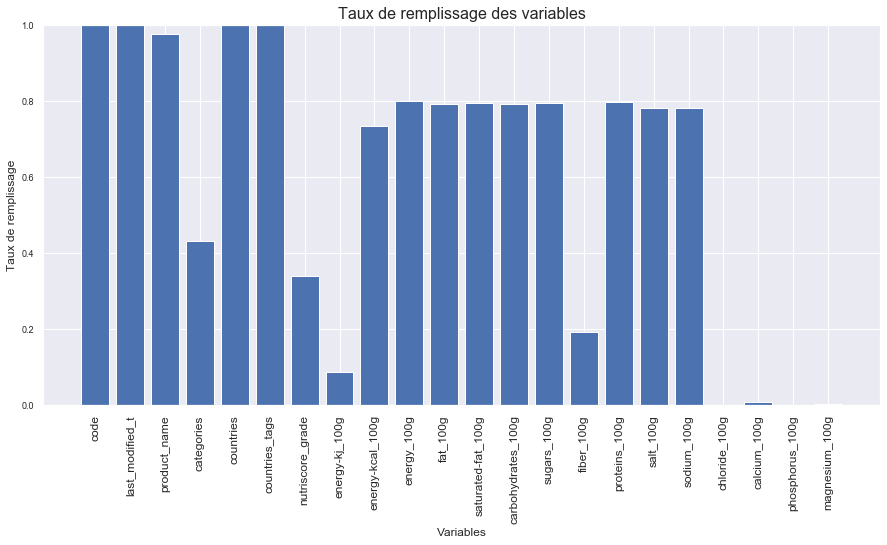

In [560]:
fig = plt.figure(figsize=(15,7))
axes = plt.axes()
axes.set_xlabel('Variables', fontsize = 12)
axes.set_ylabel('Taux de remplissage', fontsize = 12)
axes.set_ylim(0,1)
plt.title('Taux de remplissage des variables', fontsize = 16)
plt.bar(list(df_useful),Taux_Remp)
plt.xticks(list(df_useful),rotation=90,fontsize=12)
plt.yticks(fontsize=9)

On peut constater que les taux de remplissage de Chloride, calcium, phosphore et magnésium sont très faible ( inférieur à 1 %. on les laisse de côté)

In [561]:
# On enlève les élément suivants du df.
df_useful.drop(['chloride_100g', 'calcium_100g','phosphorus_100g','magnesium_100g'], axis='columns', inplace=True)

In [562]:
# On remplit les valeurs manquantes de 'energy-kcal' en se servant de 'energy-kj' et en convertissant.
df_useful['energy-kcal_100g'].fillna(df_useful['energy-kj_100g']*0.2388,inplace=True)

In [563]:
# On vérifie que notre remplissage a bien fonctionné
#df_useful[df_useful['energy-kj_100g'].notna()]

In [564]:
# Taux de remplissage des variables choisies. Ca fonctionne bien. Le taux de remplissage de energy-kcal augmente.
Taux_Remp = 1 - df_useful.isna().sum()/len(df_useful)

In [565]:
df_useful.shape

(666942, 18)

#### 3.4 - [Nettoyage DataFrame - Multiples filtres](#34)<a class="anchor" id="34"></a>

In [572]:
# Les taux de remplissage des macros nutriments sont similaires. sélectionnons uniquement les aliments pour lesquels nous
# nous avons des données.
energy_col = ['code','nutriscore_grade','product_name','energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g',
              'proteins_100g', 'carbohydrates_100g', 'sugars_100g','fiber_100g']
df_score = df_useful[energy_col].copy()
df_score.set_index(['product_name','nutriscore_grade','code'],inplace=True)
                     
df_score.dropna(inplace=True)

df_score.shape

(123926, 9)

In [573]:
# On met en place des filtres pour éliminer les produits avec des données erronées.

Check_Fat = df_score['saturated-fat_100g'] <= df_score['fat_100g']
df_score = df_score[Check_Fat]

Check_Sugar = df_score['sugars_100g'] <= df_score['carbohydrates_100g']
df_score = df_score[Check_Sugar]

Check_Fiber = df_score['fiber_100g'] <= df_score['carbohydrates_100g']
df_score = df_score[Check_Fiber]

Check_Salt = df_score['sodium_100g'] <= df_score['salt_100g']
df_score = df_score[Check_Salt]

Check_Energy_Max = df_score['energy-kcal_100g'] <= 900
df_score = df_score[Check_Energy_Max]

Check_Quantity = (df_score['fat_100g'] + df_score['carbohydrates_100g']
                   + df_score['proteins_100g'] + df_score['salt_100g']) < 100
df_score = df_score[Check_Quantity]

# Suppression valeurs négatives
mask_negatives = (df_score >= 0).all(axis=1)
df_score = df_score[mask_negatives]

df_score.shape

(63803, 9)

In [574]:
# Calcul nombre élément retiré avec filtre Check_Sugar
Check_Sugar.value_counts()

True     123772
False        73
dtype: int64

#### 3.5 - [Exportation des dataframes cleanés](#35)<a class="anchor" id="35"></a>

In [580]:
df_score.to_csv(path+"df_score.csv", sep='\t', encoding='utf-8')